In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor
from sklearn.metrics import RocCurveDisplay,roc_auc_score,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from joblib import dump


In [48]:
df=pd.read_csv('clothing')
df

,sno,Brandname,Category,Producttype,Productname,Price,color1,color2,color3,color4,Weartype,Materialtype,reviews,size1,size2,size3,size4,Country_of_origin,Return_time,Occasion
0,1,Netplay,Men,Men'S Shirts,Cotton Shirt With Patch Pocket,450,black,brown,White,Grey,top wear,Cotton,268,36,38,40,42,India,Easy 10 days return and exchange,Everyday
1,2,Teamspirit,Men,Men'S Tshirts,Relaxed Fit Ombre-Dyed Crew-Neck T-Shirt,419,black,brown,White,Grey,top wear,Cotton,21,36,38,40,42,India,Easy 10 days return and exchange,Everyday
2,3,Wuxi,Men,Men'S Shirts,Cuban Collar Shirt With Short Sleeves,480,black,brown,White,Grey,top wear,Cotton,441,36,38,40,42,India,Easy 10 days return and exchange,Everyday
3,4,Wuxi,Men,Men'S Shirts,Men Knitted Loose Fit Shirt With Mandarin Collar,480,black,brown,White,Grey,top wear,Cotton,321,36,38,40,42,India,Easy 10 days return and exchange,Everyday
4,5,Fort Collins,Men,Men'S Tshirts,Polo T-Shirt With Patch Pocket,649,black,brown,White,Grey,top wear,Cotton,320,36,38,40,42,India,Easy 10 days return and exchange,Everyday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,4311,Manyavar,Kid,"Jacket , Patiala , Kurta",Boys Forest Green Kurta With Cream Floral Prin...,4499,Blue,Yellow,Orange,Green,top wear,Cotton,78,36,38,40,42,India,Easy returns in 15 days,Celebration
4311,4312,Manyavar,Kid,"Indo-Western , Churidar , Pocket Square , Brooch",Boys Navy Blue Achkan Style Patterned Indo Wes...,4999,Blue,Yellow,Orange,Green,top wear,Blended Rayon,37,36,38,40,42,India,Easy returns in 15 days,Celebration
4312,4313,Manyavar,Kid,"Indo-Western , Churidar , Mala",Boys Cream Diamond Patterned Angrakha Style In...,3999,Blue,Yellow,Orange,Green,top wear,Art,49,36,38,40,42,India,Easy returns in 15 days,Celebration
4313,4314,Manyavar,Kid,"Indo-Western , Patiala",Boys Navy Blue Buti Patterned Angrakha Indo We...,5499,Blue,Yellow,Orange,Green,top wear,Velvet,49,36,38,40,42,India,Easy returns in 15 days,Celebration


In [49]:
df = df.drop(columns=['sno','Productname'])
df

,Brandname,Category,Producttype,Price,color1,color2,color3,color4,Weartype,Materialtype,reviews,size1,size2,size3,size4,Country_of_origin,Return_time,Occasion
0,Netplay,Men,Men'S Shirts,450,black,brown,White,Grey,top wear,Cotton,268,36,38,40,42,India,Easy 10 days return and exchange,Everyday
1,Teamspirit,Men,Men'S Tshirts,419,black,brown,White,Grey,top wear,Cotton,21,36,38,40,42,India,Easy 10 days return and exchange,Everyday
2,Wuxi,Men,Men'S Shirts,480,black,brown,White,Grey,top wear,Cotton,441,36,38,40,42,India,Easy 10 days return and exchange,Everyday
3,Wuxi,Men,Men'S Shirts,480,black,brown,White,Grey,top wear,Cotton,321,36,38,40,42,India,Easy 10 days return and exchange,Everyday
4,Fort Collins,Men,Men'S Tshirts,649,black,brown,White,Grey,top wear,Cotton,320,36,38,40,42,India,Easy 10 days return and exchange,Everyday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,Manyavar,Kid,"Jacket , Patiala , Kurta",4499,Blue,Yellow,Orange,Green,top wear,Cotton,78,36,38,40,42,India,Easy returns in 15 days,Celebration
4311,Manyavar,Kid,"Indo-Western , Churidar , Pocket Square , Brooch",4999,Blue,Yellow,Orange,Green,top wear,Blended Rayon,37,36,38,40,42,India,Easy returns in 15 days,Celebration
4312,Manyavar,Kid,"Indo-Western , Churidar , Mala",3999,Blue,Yellow,Orange,Green,top wear,Art,49,36,38,40,42,India,Easy returns in 15 days,Celebration
4313,Manyavar,Kid,"Indo-Western , Patiala",5499,Blue,Yellow,Orange,Green,top wear,Velvet,49,36,38,40,42,India,Easy returns in 15 days,Celebration


In [50]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",ccol)
print("\n")

ncol = df.select_dtypes(include=['int64','int32','float64']).columns
print("Numerical columns are:",ncol)

Categorical columns are: Index(['Brandname', 'Category', 'Producttype', 'Price', 'color1', 'color2',
       'color3', 'color4', 'Weartype', 'Materialtype', 'Country_of_origin',
       'Return_time', 'Occasion'],
      dtype='object')


Numerical columns are: Index(['reviews', 'size1', 'size2', 'size3', 'size4'], dtype='object')


In [51]:
df.isnull().sum()

Brandname            0
Category             0
Producttype          0
Price                0
color1               0
color2               0
color3               0
color4               0
Weartype             0
Materialtype         0
reviews              0
size1                0
size2                0
size3                0
size4                0
Country_of_origin    0
Return_time          0
Occasion             0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4315 entries, 0 to 4314
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brandname          4315 non-null   object
 1   Category           4315 non-null   object
 2   Producttype        4315 non-null   object
 3   Price              4315 non-null   object
 4   color1             4315 non-null   object
 5   color2             4315 non-null   object
 6   color3             4315 non-null   object
 7   color4             4315 non-null   object
 8   Weartype           4315 non-null   object
 9   Materialtype       4315 non-null   object
 10  reviews            4315 non-null   int64 
 11  size1              4315 non-null   int64 
 12  size2              4315 non-null   int64 
 13  size3              4315 non-null   int64 
 14  size4              4315 non-null   int64 
 15  Country_of_origin  4315 non-null   object
 16  Return_time        4315 non-null   object


In [53]:
df = df[df['Price'].apply(lambda x: str(x).replace('#VALUE!', '').strip()).astype(bool)]
df['Price'] = df['Price'].astype(float)


In [54]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 0 to 4314
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brandname          4311 non-null   object 
 1   Category           4311 non-null   object 
 2   Producttype        4311 non-null   object 
 3   Price              4311 non-null   float64
 4   color1             4311 non-null   object 
 5   color2             4311 non-null   object 
 6   color3             4311 non-null   object 
 7   color4             4311 non-null   object 
 8   Weartype           4311 non-null   object 
 9   Materialtype       4311 non-null   object 
 10  reviews            4311 non-null   int64  
 11  size1              4311 non-null   int64  
 12  size2              4311 non-null   int64  
 13  size3              4311 non-null   int64  
 14  size4              4311 non-null   int64  
 15  Country_of_origin  4311 non-null   object 
 16  Return_time        4311 

In [56]:
df

,Brandname,Category,Producttype,Price,color1,color2,color3,color4,Weartype,Materialtype,reviews,size1,size2,size3,size4,Country_of_origin,Return_time,Occasion
0,Netplay,Men,Men'S Shirts,450.0,black,brown,White,Grey,top wear,Cotton,268,36,38,40,42,India,Easy 10 days return and exchange,Everyday
1,Teamspirit,Men,Men'S Tshirts,419.0,black,brown,White,Grey,top wear,Cotton,21,36,38,40,42,India,Easy 10 days return and exchange,Everyday
2,Wuxi,Men,Men'S Shirts,480.0,black,brown,White,Grey,top wear,Cotton,441,36,38,40,42,India,Easy 10 days return and exchange,Everyday
3,Wuxi,Men,Men'S Shirts,480.0,black,brown,White,Grey,top wear,Cotton,321,36,38,40,42,India,Easy 10 days return and exchange,Everyday
4,Fort Collins,Men,Men'S Tshirts,649.0,black,brown,White,Grey,top wear,Cotton,320,36,38,40,42,India,Easy 10 days return and exchange,Everyday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,Manyavar,Kid,"Jacket , Patiala , Kurta",4499.0,Blue,Yellow,Orange,Green,top wear,Cotton,78,36,38,40,42,India,Easy returns in 15 days,Celebration
4311,Manyavar,Kid,"Indo-Western , Churidar , Pocket Square , Brooch",4999.0,Blue,Yellow,Orange,Green,top wear,Blended Rayon,37,36,38,40,42,India,Easy returns in 15 days,Celebration
4312,Manyavar,Kid,"Indo-Western , Churidar , Mala",3999.0,Blue,Yellow,Orange,Green,top wear,Art,49,36,38,40,42,India,Easy returns in 15 days,Celebration
4313,Manyavar,Kid,"Indo-Western , Patiala",5499.0,Blue,Yellow,Orange,Green,top wear,Velvet,49,36,38,40,42,India,Easy returns in 15 days,Celebration


In [57]:
df.describe()

,Price,reviews,size1,size2,size3,size4
count,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,2114.211552,156.498956,32.485734,34.485734,36.764556,39.216423
std,4046.075406,142.867946,3.721477,3.721477,3.749463,3.247740
min,150.000000,1.000000,24.000000,26.000000,28.000000,32.000000
25%,896.000000,47.000000,32.000000,34.000000,36.000000,38.000000
50%,1260.000000,90.000000,32.000000,34.000000,36.000000,40.000000
75%,1899.000000,255.000000,36.000000,38.000000,40.000000,42.000000
max,44999.000000,672.000000,38.000000,40.000000,42.000000,44.000000


# 
From the provided summary statistics for the variables Price, reviews, size1, size2, size3, and size4, we can observe the following:

Price:
The mean price of products is approximately 2114.21, with a large standard deviation of 4046.08, indicating significant variability in prices. 

The minimum price observed is 150, while the maximum price is 44999, suggesting a wide range of prices in the dataset.
The distribution of prices appears to be positively skewed, as the mean is greater than the median (50th percentile).

Reviews:
The mean number of reviews is approximately 156.50, with a standard deviation of approximately 142.87, indicating variability in the number of reviews.

The minimum number of reviews is 1, while the maximum number is 672, suggesting a wide range of review counts.

Similar to price, the distribution of reviews appears to be positively skewed.
Sizes (size1, size2, size3, size4):
The sizes (size1, size2, size3, and size4) seem to represent different dimensions or attributes of the products.
All size attributes have similar summary statistics, with mean values around 32 to 36 and standard deviations around 3 to 4.
The minimum and maximum values for each size attribute indicate a limited range, with minimum values around 24 to 28 and maximum values around 38 to 44.
The distribution of sizes appears to be relatively symmetric, as the mean and median are close to each other.

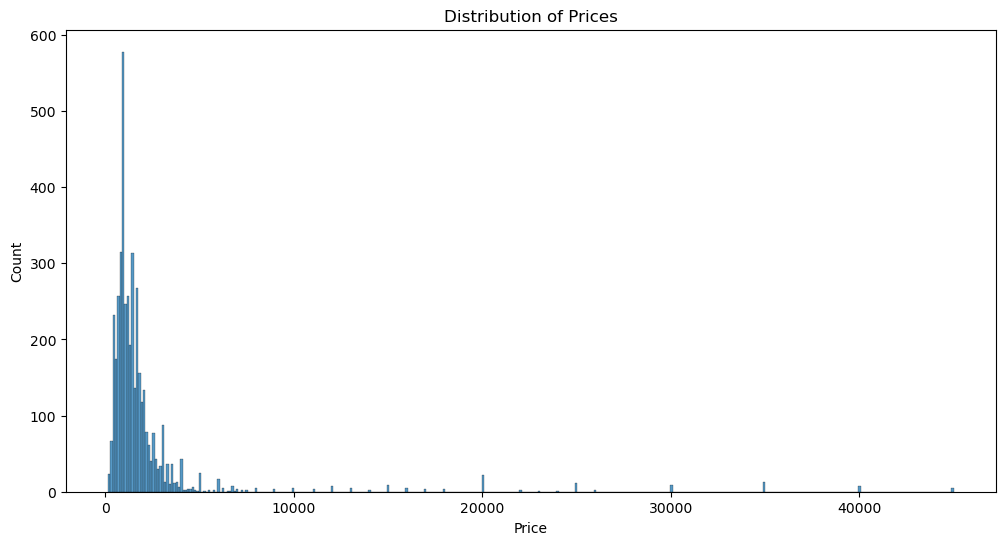

In [13]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'])
plt.title('Distribution of Prices')
plt.show()

In [14]:
# Display basic statistics for 'Price' and 'reviews' columns
price_reviews_stats = df[['Price', 'reviews']].describe()
print(price_reviews_stats)

              Price      reviews
count   4311.000000  4311.000000
mean    2114.211552   156.498956
std     4046.075406   142.867946
min      150.000000     1.000000
25%      896.000000    47.000000
50%     1260.000000    90.000000
75%     1899.000000   255.000000
max    44999.000000   672.000000


# Price#Reviews :

The average price of the items is approximately 2114.21, with a wide range of prices from 150 to 44999, indicating a diverse product range from budget to premium items.
The standard deviation is quite high at 4046.08, suggesting significant variability in pricing.

Reviews:
The average number of reviews per item is around 156.5, with a minimum of 1 and a maximum of 672 reviews per item.
The standard deviation for reviews is 142.87, indicating that the number of reviews also varies considerably across different items.

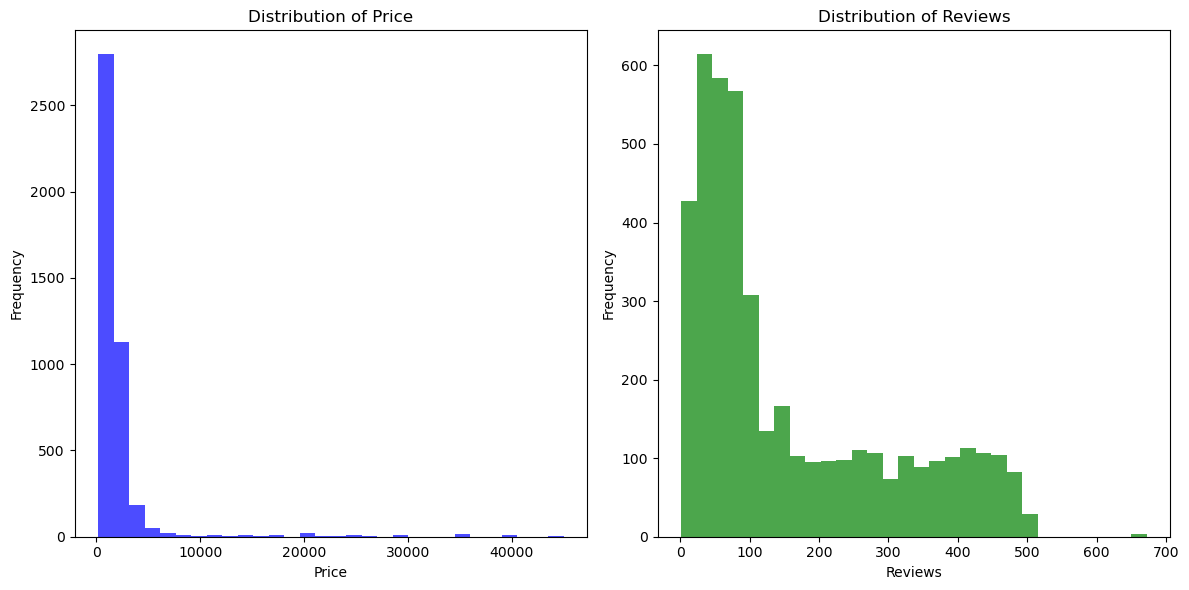

In [15]:
# Plotting histograms for 'Price' and 'reviews'
plt.figure(figsize=(12, 6), facecolor='white')

# Histogram for 'Price'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['Price'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for 'reviews'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df['reviews'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 
These histograms provide a visual representation of the data distributions:
Price: The histogram shows a right-skewed distribution, indicating that most products are priced lower, with a few high-priced outliers.
Reviews: Similarly, this histogram is right-skewed, suggesting that most products have fewer reviews, with some products receiving significantly more reviews.

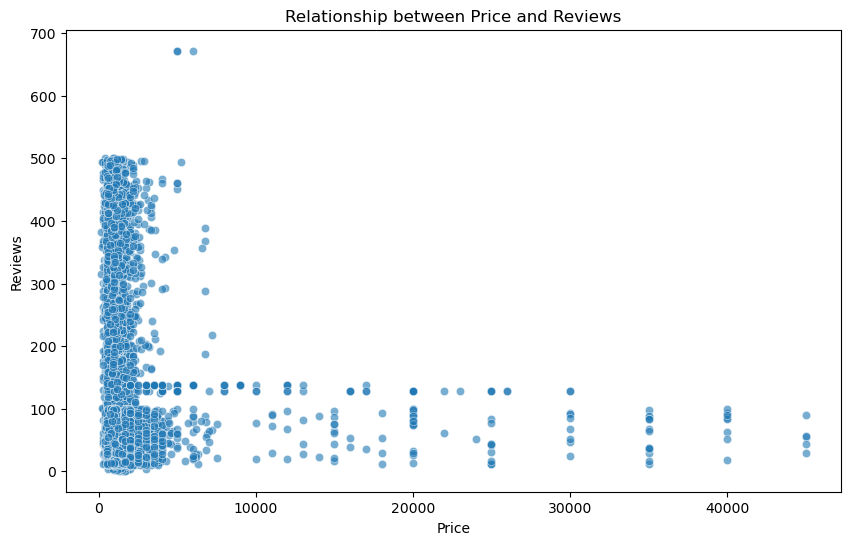

In [16]:
# Scatter plot to explore the relationship between 'Price' and 'reviews'
plt.figure(figsize=(10, 6), facecolor='white')
sns.scatterplot(x='Price', y='reviews', data=df, alpha=0.6)
plt.title('Relationship between Price and Reviews')
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.show()

# 
The scatter plot shows a wide distribution of data points, primarily clustered at the lower price range with varying numbers of reviews.
There doesn't appear to be a strong linear relationship between price and the number of reviews, suggesting that higher prices do not necessarily correlate with more reviews.
Most of the products with a higher number of reviews are in the lower to mid-price range, which might indicate that more affordable products tend to attract more reviews.

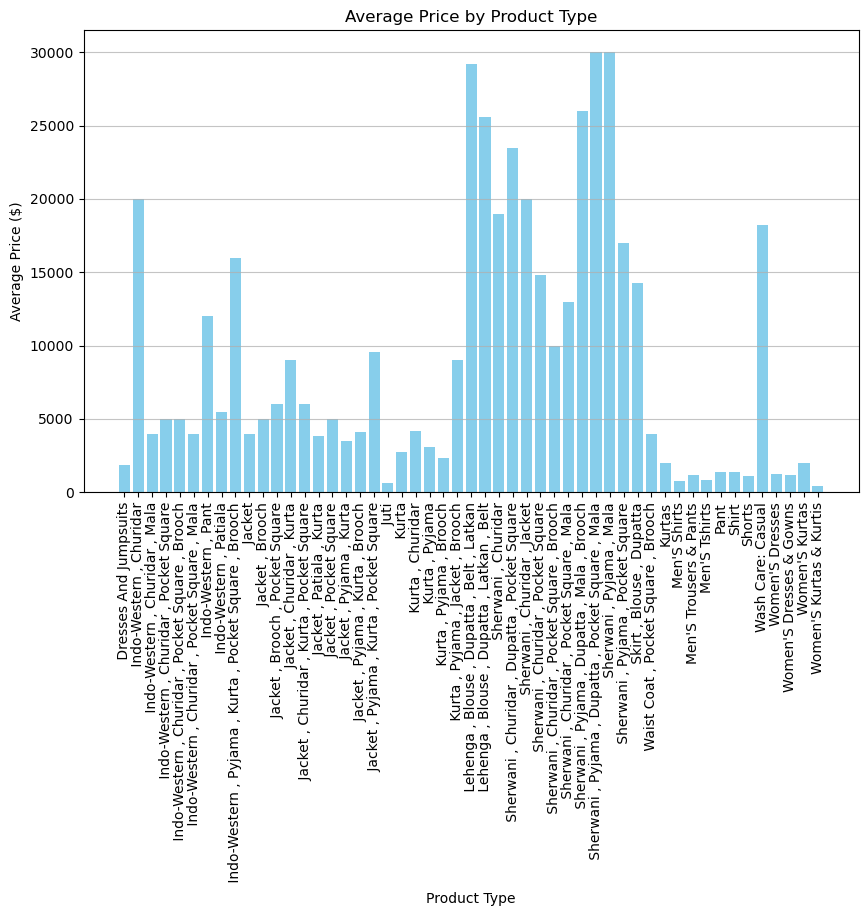

In [17]:
avg_pr = df.groupby('Producttype')['Price'].mean().reset_index()

# Plotting the graph against price and product type
plt.figure(figsize=(10, 6))
plt.bar(avg_pr['Producttype'], avg_pr['Price'], color='skyblue')
plt.title('Average Price by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Price')
plt.xticks(rotation= 90)
plt.grid(axis='y', alpha=0.75)
plt.show()

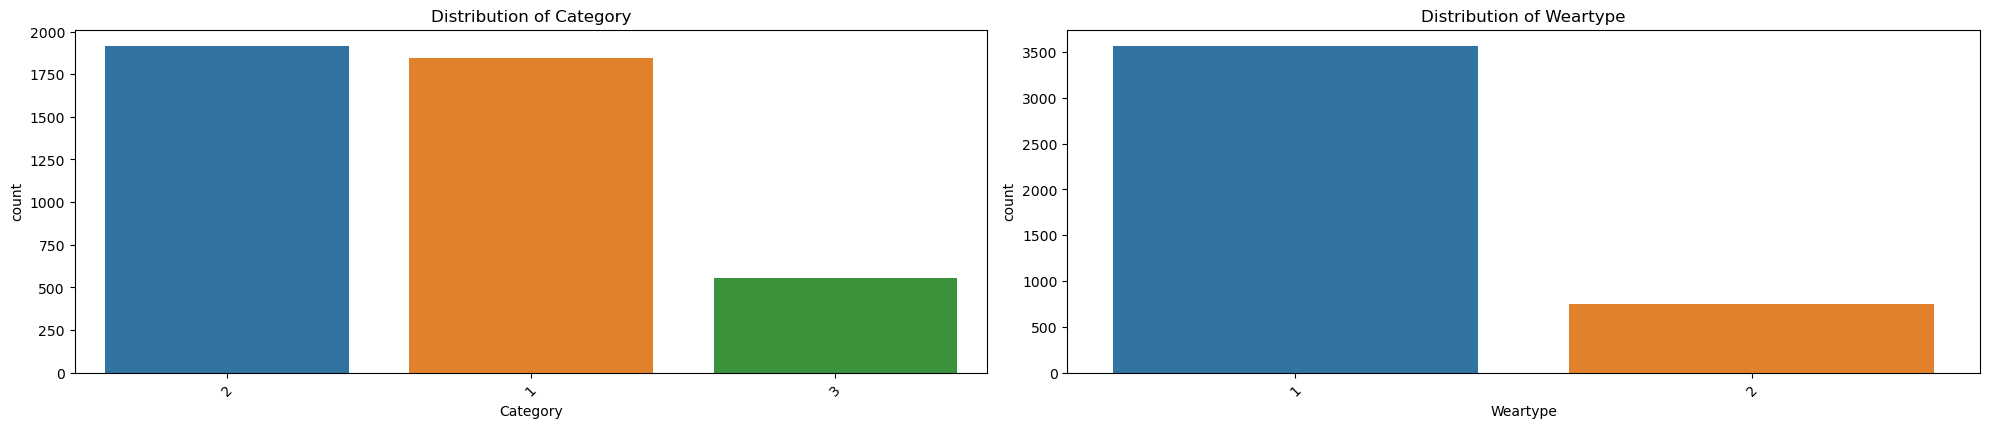

In [45]:
# Count plots for categorical features
categorical_features = ['Category', 'Weartype']

plt.figure(figsize=(20, 12), facecolor='white')
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[feature], order = df[feature].value_counts().index)
    plt.title('Distribution of ' + feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 
# 
Category: The distribution shows a variety of categories with some being more prevalent than others.

Weartype: Certain wear types are more common, which could influence the types of products predominantly available.

In [18]:
df.columns

Index(['Brandname', 'Category', 'Producttype', 'Productname', 'Price',
       'color1', 'color2', 'color3', 'color4', 'Weartype', 'Materialtype',
       'reviews', 'size1', 'size2', 'size3', 'size4', 'Country_of_origin',
       'Return_time', 'Occasion'],
      dtype='object')

In [19]:
df['Country_of_origin']=df['Country_of_origin'].fillna( df['Country_of_origin'].mode())

In [20]:
#ENCODING WEAR TYPE COLUMN
df['Weartype'] = df['Weartype'].apply(lambda x: 1 if x in ['top wear'] else 2 )

In [21]:
df['Weartype'].unique()

array([1, 2], dtype=int64)

In [22]:
#ENCODING CATEGORY COLUMN
df['Category'] = df['Category'].apply(lambda x: 1 if x in ['Men'] else 2 if x in ['Women'] else 3 if x in ['Kid'] else None)

In [23]:
df['Category'].unique()

array([1, 2, 3], dtype=int64)

In [24]:
# Handling missing values and encoding categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler

df.fillna(df.mean(), inplace=True)  # Fill numeric columns with mean
encoder = LabelEncoder()

# Encoding categorical variables
for column in ['Brandname', 'Producttype', 'Productname', 'color1', 'color2', 'color3', 'color4', 'Materialtype', 'Country_of_origin', 'Return_time', 'Occasion']:
    df[column] = encoder.fit_transform(df[column])

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['Price', 'Occasion'], axis=1))

print('Preprocessing done. Categorical variables encoded and features scaled.')

Preprocessing done. Categorical variables encoded and features scaled.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
coder = LabelEncoder()

categorical_columns = ['Brandname', 'Producttype', 'Productname', 'color1', 'color2', 'color3', 'color4', 'Materialtype', 'Country_of_origin', 'Return_time', 'Occasion']

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    df[column] = coder.fit_transform(df[column])

print('Encoding applied to categorical columns.')
print(df.head())

In [25]:
df

,Brandname,Category,Producttype,Productname,Price,color1,color2,color3,color4,Weartype,Materialtype,reviews,size1,size2,size3,size4,Country_of_origin,Return_time,Occasion
0,132,1,40,556,450.0,5,6,4,1,1,46,268,36,38,40,42,0,1,7
1,191,1,42,2098,419.0,5,6,4,1,1,46,21,36,38,40,42,0,1,7
2,216,1,40,591,480.0,5,6,4,1,1,46,441,36,38,40,42,0,1,7
3,216,1,40,1257,480.0,5,6,4,1,1,46,321,36,38,40,42,0,1,7
4,58,1,42,1843,649.0,5,6,4,1,1,46,320,36,38,40,42,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,121,3,14,344,4499.0,1,5,2,0,1,25,78,36,38,40,42,0,3,2
4311,121,3,4,366,4999.0,1,5,2,0,1,11,37,36,38,40,42,0,3,2
4312,121,3,2,340,3999.0,1,5,2,0,1,1,49,36,38,40,42,0,3,2
4313,121,3,7,367,5499.0,1,5,2,0,1,34,49,36,38,40,42,0,3,2


<Axes: >

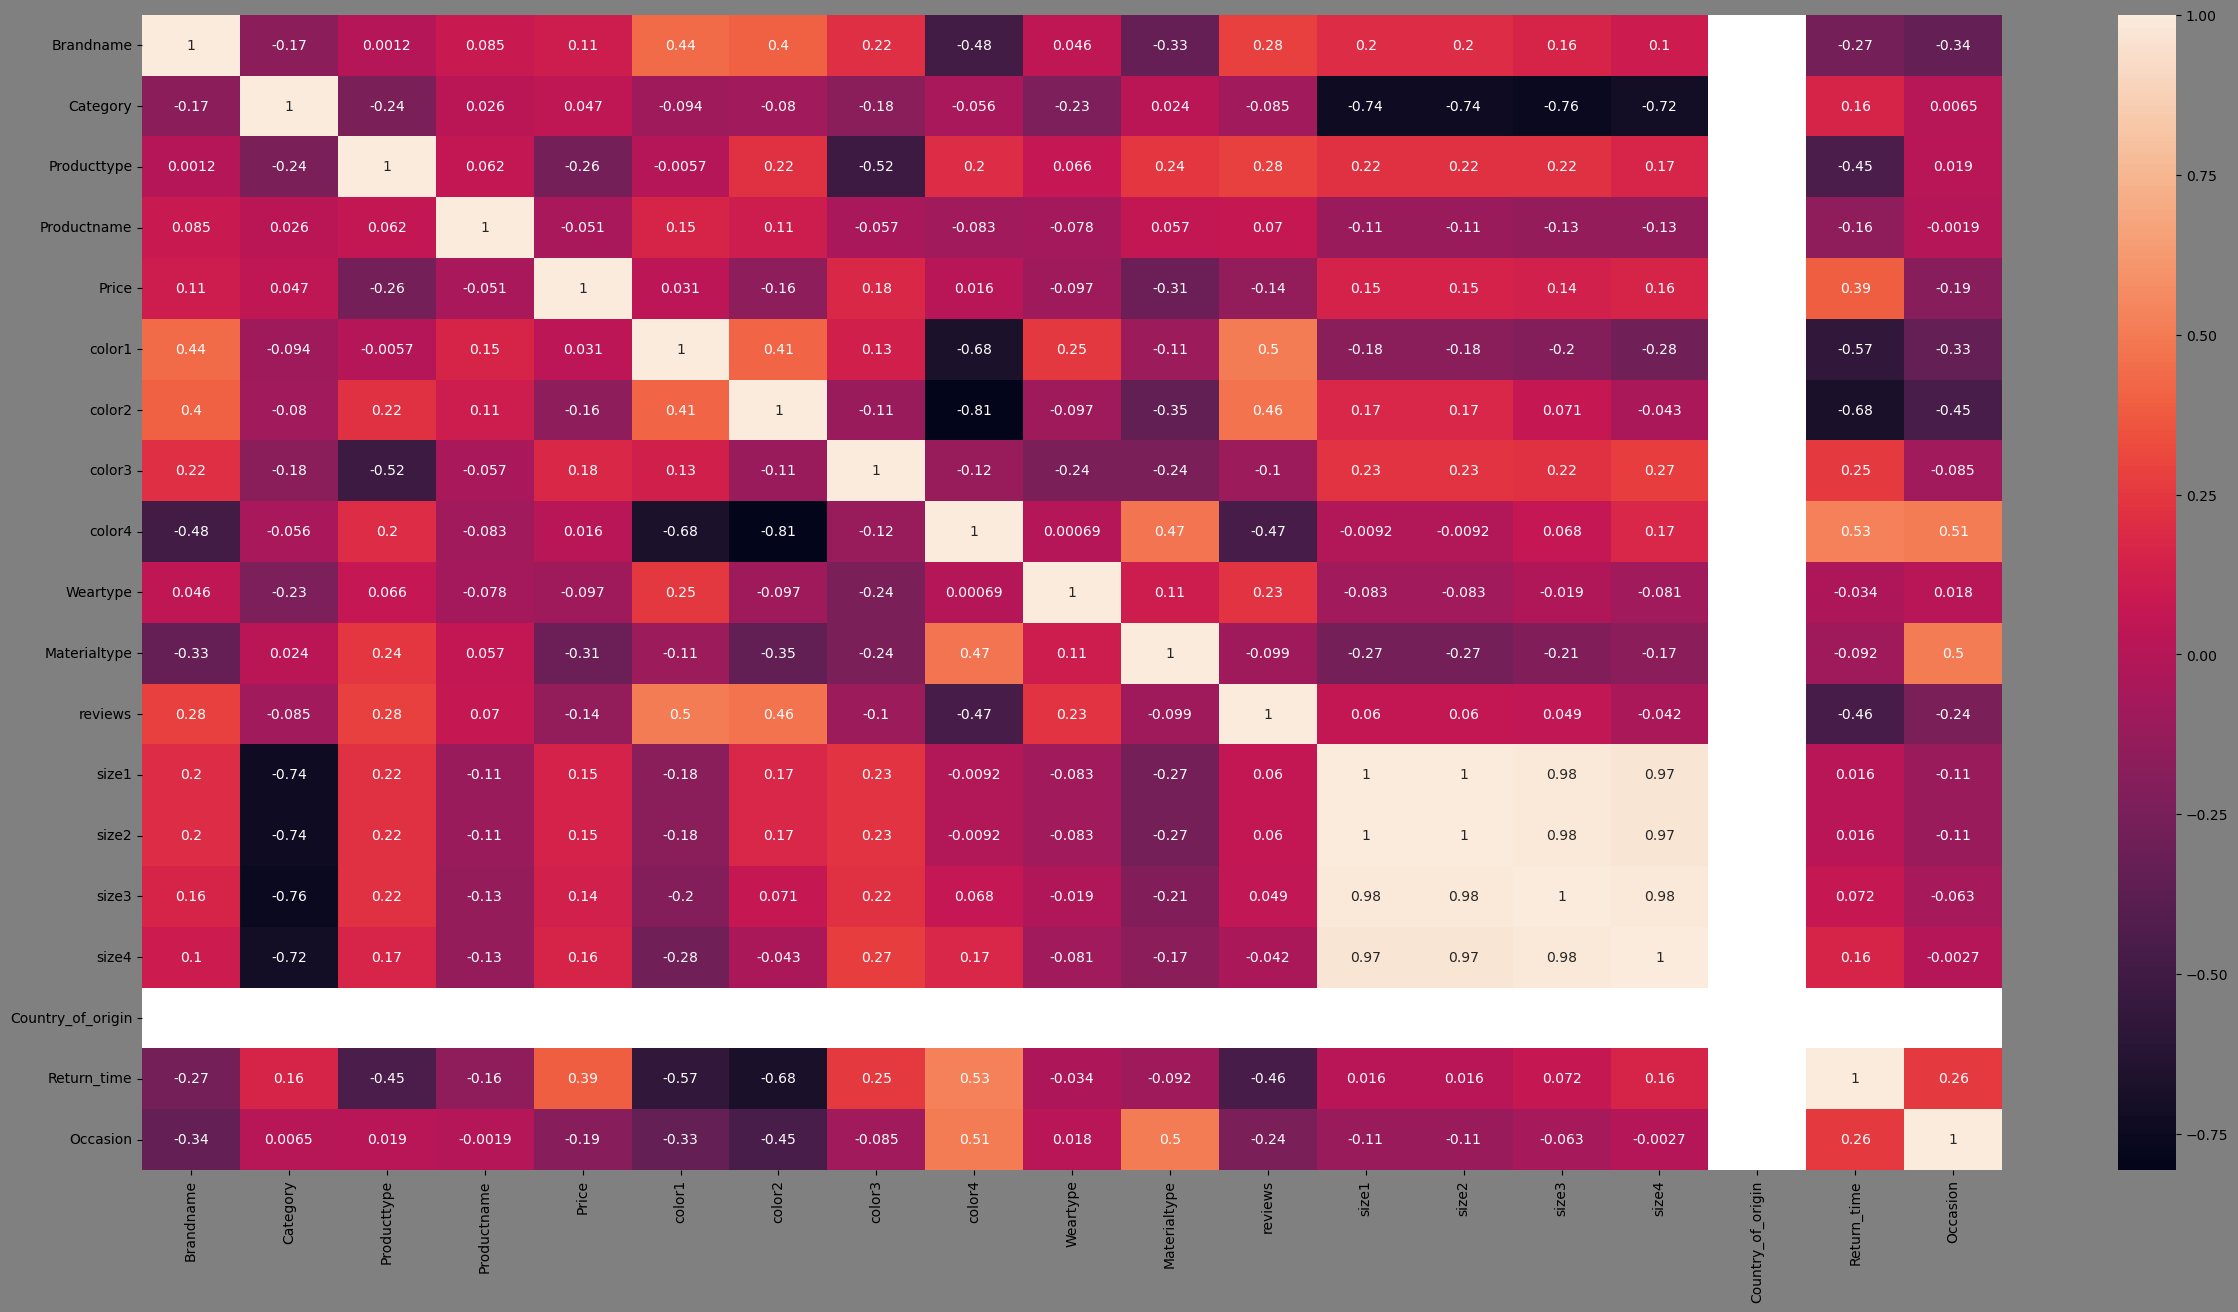

In [28]:
plt.figure(figsize = (30, 15), facecolor= 'grey')
sns.heatmap(df.corr(), annot = True)

In [30]:
df.skew()

Brandname            1.193585
Category             0.459089
Producttype         -2.919687
Productname         -0.014061
Price                6.679568
color1              -0.634373
color2              -0.382136
color3               1.349677
color4              -0.062400
Weartype             1.731352
Materialtype        -1.133918
reviews              0.980983
size1               -0.769156
size2               -0.769156
size3               -0.966173
size4               -0.730812
Country_of_origin    0.000000
Return_time          1.164148
Occasion             1.059348
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Setting up the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search to find the best hyperparameters
grid_search_price = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_price.fit(X_train_price, y_train_price)

best_params_price = grid_search_price.best_params_
best_score_price = grid_search_price.best_score_

print('Best parameters for price prediction:', best_params_price)
print('Best score (MSE) for price prediction:', best_score_price)

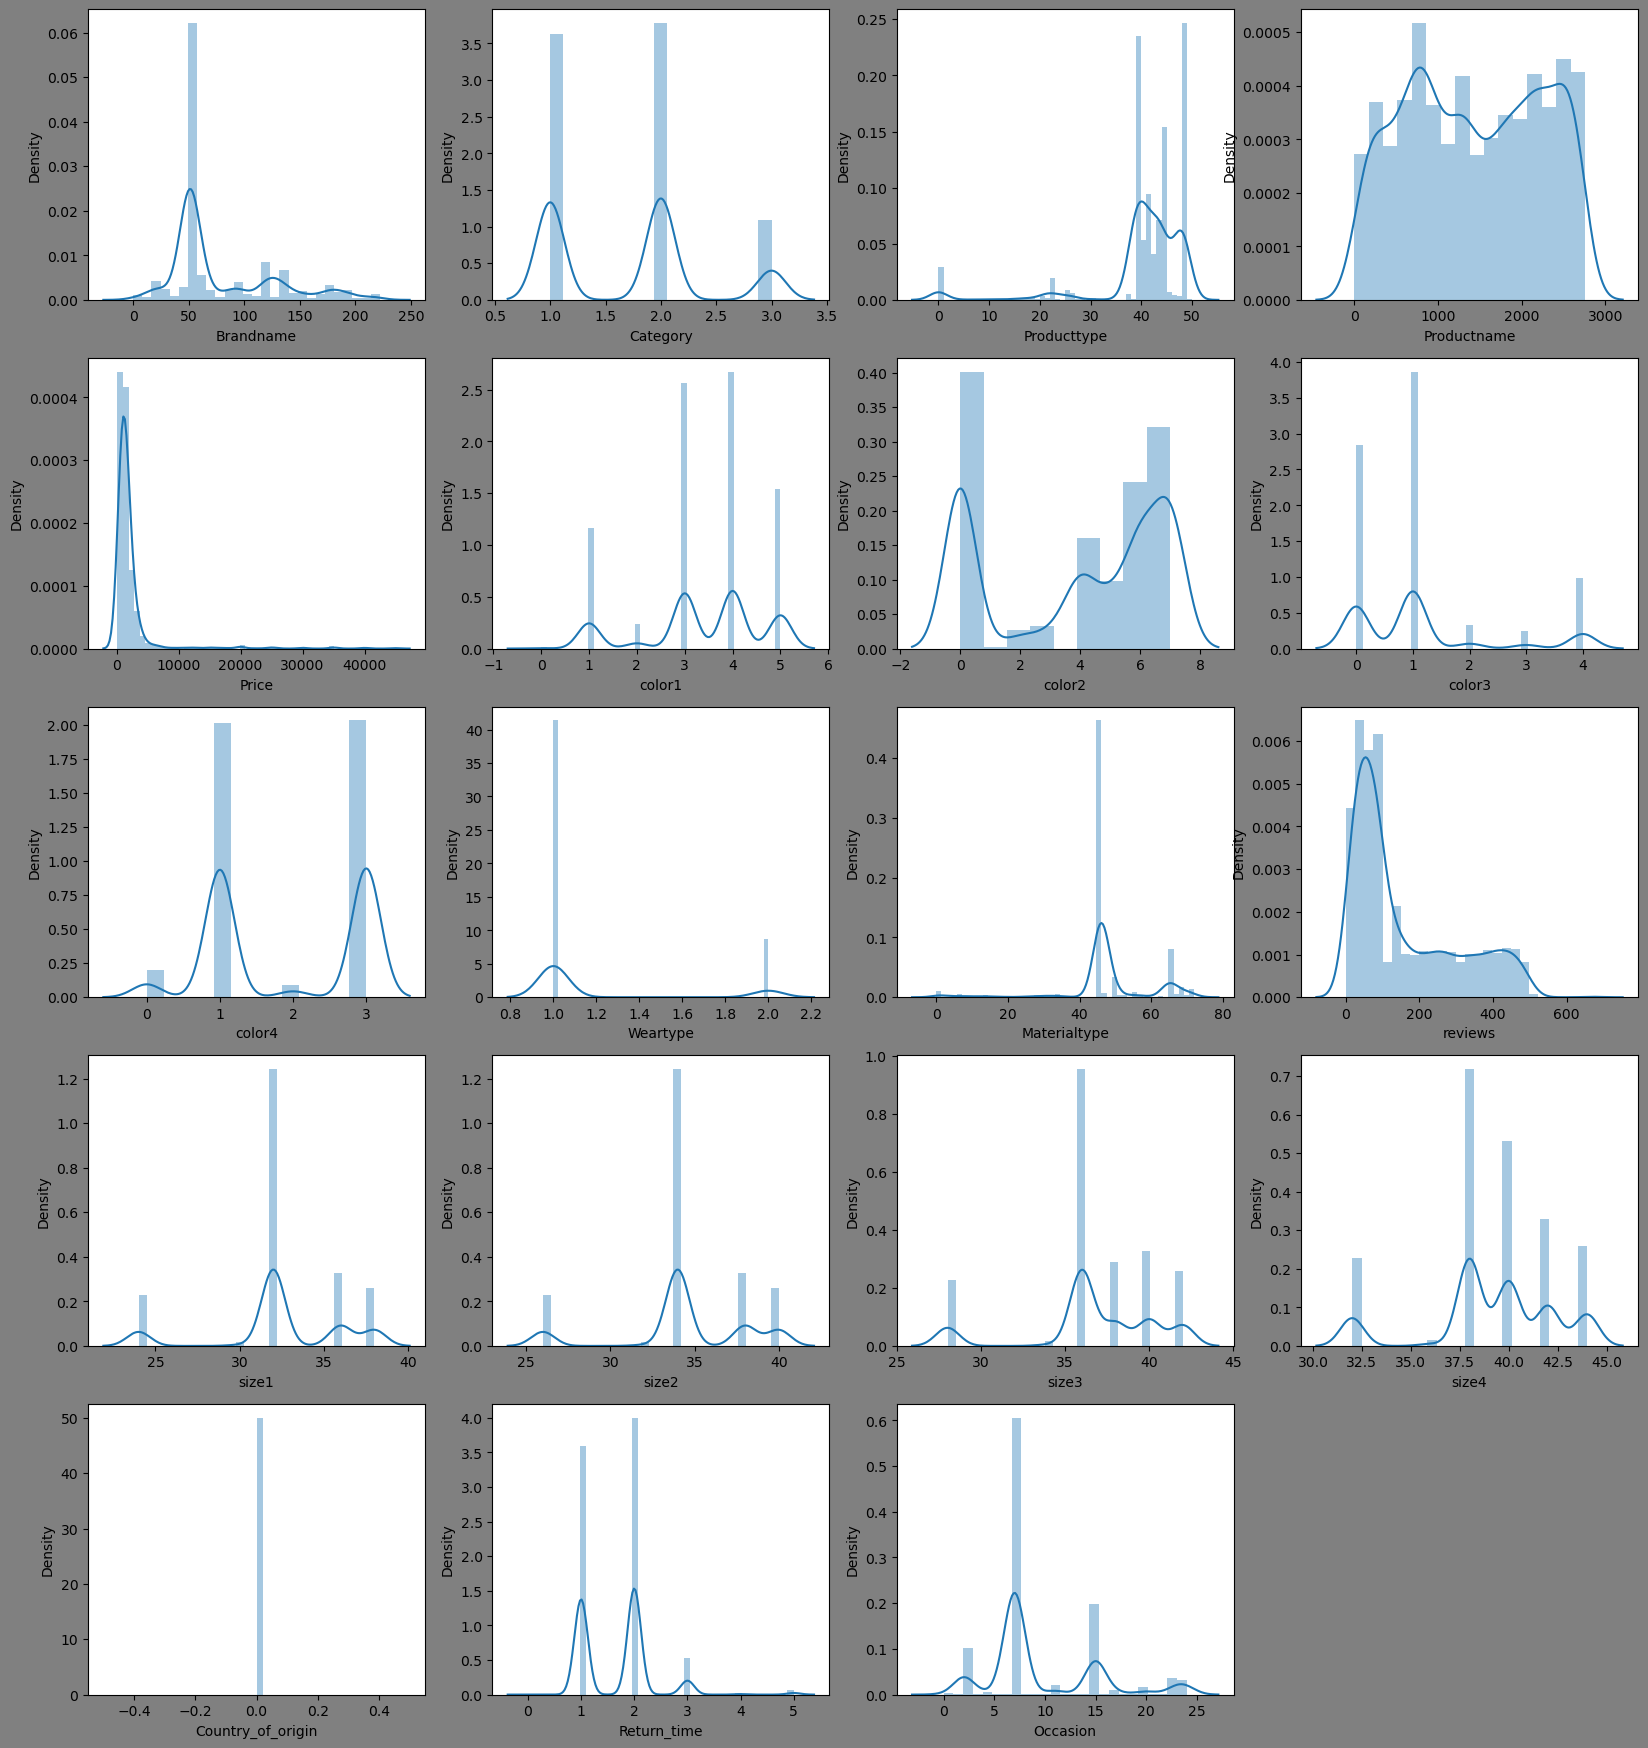

In [26]:
plt.figure(figsize = (20, 40), facecolor= 'grey')
pn = 1
for i in df:
    if pn < 40:
        ax= plt.subplot(9,4, pn)
        sns.distplot(df[i])
        pn += 1

In [37]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = scaled_features
y_price = df['Price']
y_occasion = df['Occasion']

X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42)
X_train_occasion, X_test_occasion, y_train_occasion, y_test_occasion = train_test_split(X, y_occasion, test_size=0.2, random_state=42)

print('Data split into training and testing sets for both price and occasion predictions.')

Data split into training and testing sets for both price and occasion predictions.


In [43]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_price_train)
X_test_scaled = scaler.transform(X_price_test)


# Hyperparameter Tuning using GridSearchCV
# Define parameter grid for RandomForestRegressor
param_grid_price = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for price prediction
grid_search_price = GridSearchCV(RandomForestRegressor(), param_grid_price, cv=5, scoring='neg_mean_squared_error')
grid_search_price.fit(X_train_scaled, y_price_train)
best_price_model = grid_search_price.best_estimator_

# Model Evaluation
# Evaluate the best models on the testing data
price_predictions = best_price_model.predict(X_test_scaled)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_price_train)
X_test_scaled = scaler.transform(X_price_test)




# Hyperparameter Tuning using GridSearchCV
# Define parameter grid for RandomForestRegressor
param_grid_price = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define parameter grid for RandomForestClassifier
param_grid_occasion = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for price prediction
grid_search_price = GridSearchCV(RandomForestRegressor(), param_grid_price, cv=5, scoring='neg_mean_squared_error')
grid_search_price.fit(X_train_scaled, y_price_train)
best_price_model = grid_search_price.best_estimator_

# Perform GridSearchCV for occasion prediction
grid_search_occasion = GridSearchCV(RandomForestClassifier(), param_grid_occasion, cv=5, scoring='accuracy')
grid_search_occasion.fit(X_train, y_occasion_train)
best_occasion_model = grid_search_occasion.best_estimator_

# Model Evaluation
# Evaluate the best models on the testing data
price_predictions = best_price_model.predict(X_test_scaled)
occasion_predictions = best_occasion_model.predict(X_test)


In [39]:
# Split the dataset into features and target variables for price prediction
X_price = df.drop(columns=['Price'])  # Features for price prediction

y_price = df['Price']  # Target variable for price prediction

# Split the datasets into training and testing sets
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=0.2, random_state=42)


# Feature scaling
scaler = StandardScaler()
X_price_train_scaled = scaler.fit_transform(X_price_train)
X_price_test_scaled = scaler.transform(X_price_test)

# Train a Random Forest Regressor for price prediction
price_model = RandomForestRegressor(n_estimators=100, random_state=42)
price_model.fit(X_price_train_scaled, y_price_train)

# Make predictions for price
price_predictions = price_model.predict(X_price_test_scaled)

# Calculate RMSE for price prediction
price_rmse = mean_squared_error(y_price_test, price_predictions, squared=False)
print("RMSE for Price Prediction:", price_rmse)

RMSE for Price Prediction: 1645.74839313808


In [40]:
# Split the dataset into features and target variables for occasion prediction
X_occasion = df.drop(columns=['Occasion'])  # Features for occasion prediction
y_occasion = df['Occasion']  # Target variable for occasion prediction

X_occasion_train, X_occasion_test, y_occasion_train, y_occasion_test = train_test_split(X_occasion, y_occasion, test_size=0.2, random_state=42)


# Train a Random Forest Classifier for occasion prediction
occasion_model = RandomForestClassifier(n_estimators=100, random_state=42)
occasion_model.fit(X_occasion_train, y_occasion_train)

# Make predictions for occasion
occasion_predictions = occasion_model.predict(X_occasion_test)

# Calculate accuracy for occasion prediction
occasion_accuracy = accuracy_score(y_occasion_test, occasion_predictions)
print("Accuracy for Occasion Prediction:", occasion_accuracy)

Accuracy for Occasion Prediction: 0.7833140208574739


In [59]:
import pickle

best_model = RandomForestRegressor()  

filename = "clothing.pkl"
pickle.dump(best_model, open(filename, 'wb'))
